### Content


1.   Load Pre-trained Model and explore
2.   Access model inputs/outputs
3.   Get model layers,layer inputs/outputs
4.   Access deep layers and layer outputs



### Load pre trained VGG19 model

In [1]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
drive.mount("gdrive")

Mounted at gdrive


In [2]:
model = VGG19()

574717952/574710816 [==============================] - 4s 0us/step


In [3]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Access Model input and output



*   ***input*** attribute of the **Model** object return *input layer* of the model
*   ***output*** attrubute return *output layer* of the model


In [4]:
print(model.input)
print(model.output)

Tensor("input_1:0", shape=(None, 224, 224, 3), dtype=float32)
Tensor("predictions/Softmax:0", shape=(None, 1000), dtype=float32)


### Get model layers and Access input and outputs


*   ***layers*** attribute returns all layers in the network
*   ***input*** and ***output*** attribute return input and output of the selected layer


In [5]:
vgg_layers = model.layers
vgg_layers

In [6]:
for layer in vgg_layers:
    print(layer.input)
    print(layer.output)
    print("-"*40)

Tensor("input_1:0", shape=(None, 224, 224, 3), dtype=float32)
Tensor("input_1:0", shape=(None, 224, 224, 3), dtype=float32)
----------------------------------------
Tensor("input_1:0", shape=(None, 224, 224, 3), dtype=float32)
Tensor("block1_conv1/Relu:0", shape=(None, 224, 224, 64), dtype=float32)
----------------------------------------
Tensor("block1_conv1/Relu:0", shape=(None, 224, 224, 64), dtype=float32)
Tensor("block1_conv2/Relu:0", shape=(None, 224, 224, 64), dtype=float32)
----------------------------------------
Tensor("block1_conv2/Relu:0", shape=(None, 224, 224, 64), dtype=float32)
Tensor("block1_pool/MaxPool:0", shape=(None, 112, 112, 64), dtype=float32)
----------------------------------------
Tensor("block1_pool/MaxPool:0", shape=(None, 112, 112, 64), dtype=float32)
Tensor("block2_conv1/Relu:0", shape=(None, 112, 112, 128), dtype=float32)
----------------------------------------
Tensor("block2_conv1/Relu:0", shape=(None, 112, 112, 128), dtype=float32)
Tensor("block2_conv

### Create new model using VGG input and output layers


*   input layer is same vgg model input
*   grab all output layers from vgg model



In [7]:
input_layer = model.input
output_layers = [ layer.output for layer in model.layers]

In [8]:
new_model = Model(inputs = input_layer,
                  outputs = output_layers)

In [9]:
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

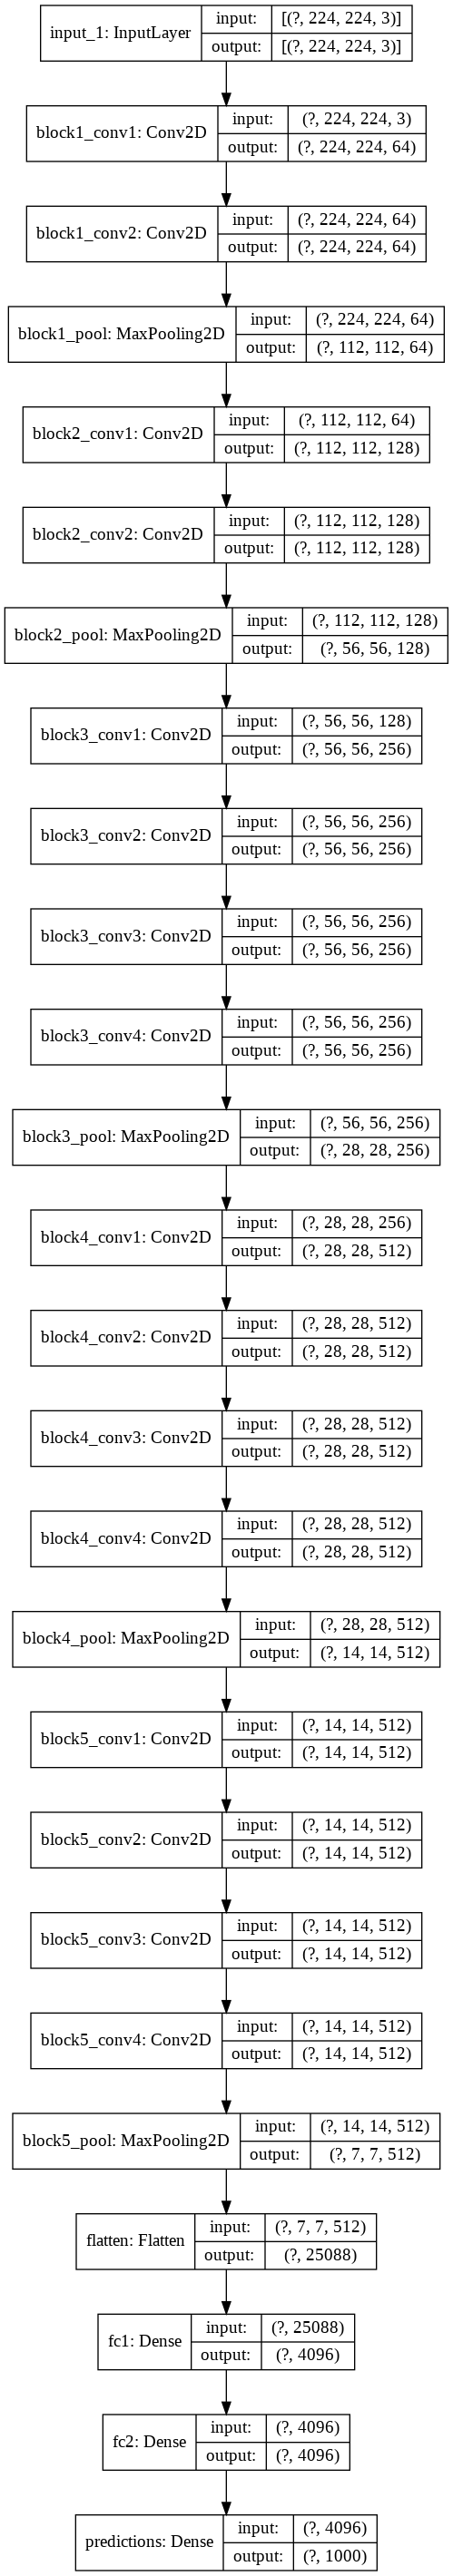

In [10]:
plot_model(new_model,show_layer_names=True,show_shapes=True)

Now we have a copy of VGG19 model which layers are extracted from the original model

### Access Deep layers of the new model (copy of VGG19)

Lets input  cat (Jordan) image for the model and explore deep layers.
#### About Jordan
Jordan is a Real life Cat Burglar! Instead of going after those regular old cat things, he started hunting down shoes. Lots and lots of shoes! 
https://www.facebook.com/OfficialJordanTheFelineCatBurglar

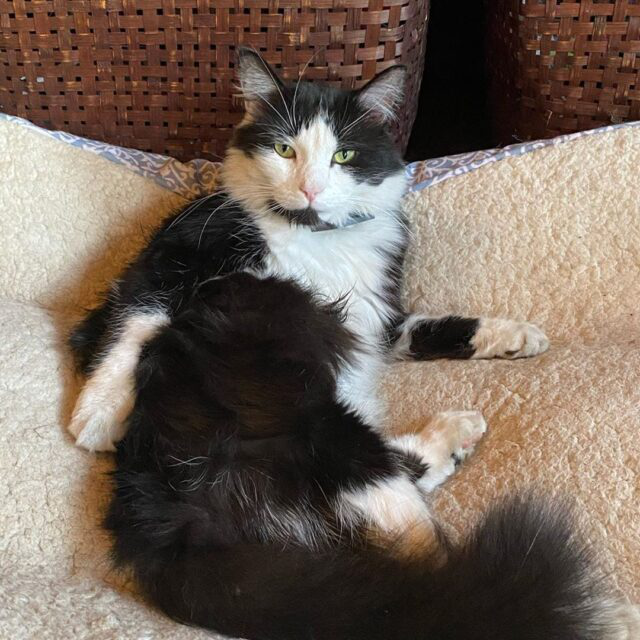

In [11]:
display.display(Image.open('gdrive/My Drive/useful_notebooks/customising_tensorflow_models/jordan.jpg'))

#### Preprocess image to fit to vgg19 model
***preprocess_input*** function is special function for preprocess images for vgg19 model.Returns Preprocessed numpy.array or a tf.Tensor with type float32.

The images are converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.

In [20]:
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = 'gdrive/My Drive/useful_notebooks/customising_tensorflow_models/jordan.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


#### Fit to the model

In [21]:
extracted_features = new_model(x)

#### Plot Channels

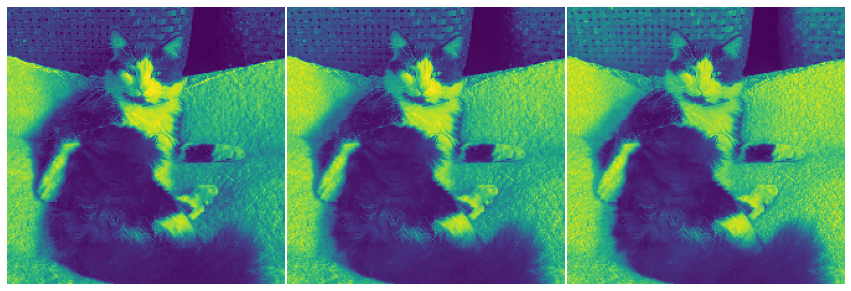

In [ ]:
f1 = extracted_features[0]
imgs = f1[0,:,:]
plt.figure(figsize=(15,15))
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    plt.imshow(imgs[:,:,i])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01,hspace=0.01)

#### Access  hidden layers
We can access hidden layers by 

*   layer index
*   layer name



First hidden layer is **block1_conv1** (1st index) convolutional layer which has 64 channels.We will plot only 16 output.

Firts conv layers start to identify some edges of the image and eyes of the cat

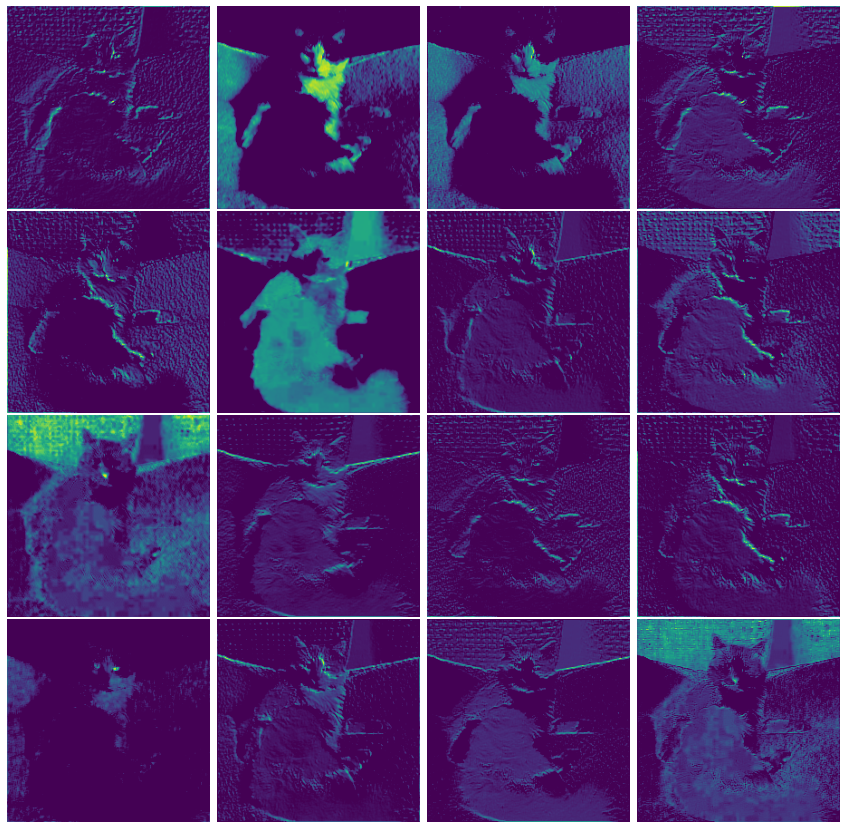

In [ ]:
f2 = extracted_features[1]
imgs = f2[0,:,:]
plt.figure(figsize=(15,15))
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(imgs[:,:,i])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01,hspace=0.01)

#### Access by layer name using **get_layer** function.

In [ ]:
extracted_feature_layer_block1_pool1 = Model(inputs = new_model.input, outputs = new_model.get_layer("block1_pool").output)
block1_pool1_features = extracted_feature_layer_block1_pool1.predict(x)

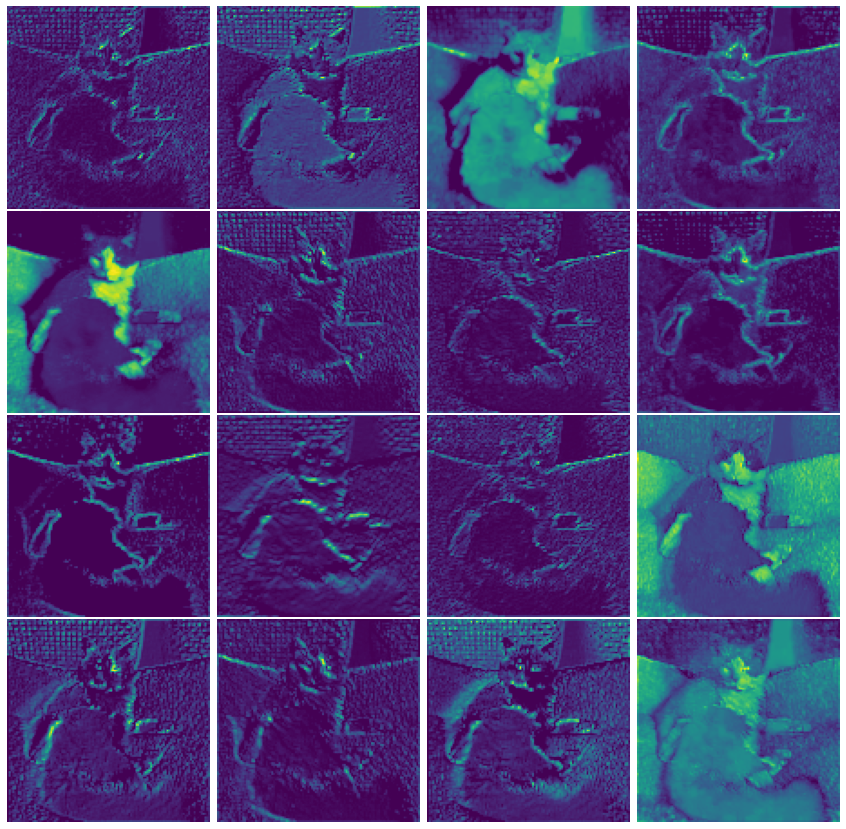

In [ ]:
imgs = block1_pool1_features[0,:,:]
plt.figure(figsize=(15,15))
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(imgs[:,:,i])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01,hspace=0.01)

In [ ]:
extracted_feature_layer_block5_conv4 = Model(inputs = new_model.input, outputs = new_model.get_layer("block5_conv4").output)
block5_conv4_features = extracted_feature_layer_block5_conv4.predict(x)

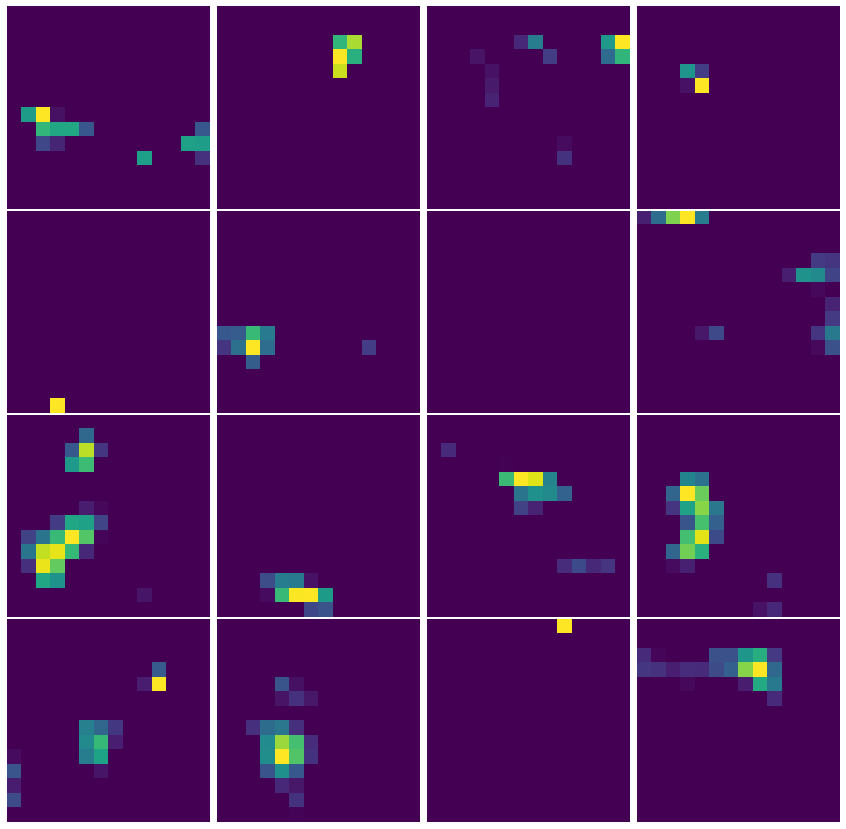

In [ ]:
imgs = block5_conv4_features[0,:,:]
plt.figure(figsize=(15,15))
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(imgs[:,:,i])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01,hspace=0.01)